In [1]:
import pandas as pd
import numpy
import datetime

In [2]:
rawData = pd.read_csv("./Parking_Citations.csv", encoding='utf-8')
rawData = rawData.dropna(subset=['ViolDate'])
rawData['ViolDate'] = rawData['ViolDate'].apply(lambda x : datetime.datetime.strptime(str(x), '%m/%d/%Y %I:%M:%S %p'))
rawData['year'] = rawData['ViolDate'].apply(lambda x : x.year)
# filter out 2019 records
rawData = rawData[rawData['year'] < 2019]

/Users/weihaoran/.virtualenvs/nlp/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2840515 entries, 0 to 3374647
Data columns (total 22 columns):
Citation           int64
Tag                object
ExpMM              object
ExpYY              float64
State              object
Make               object
Address            object
ViolCode           int64
Description        object
ViolFine           float64
ViolDate           datetime64[ns]
Balance            float64
PenaltyDate        float64
OpenFine           float64
OpenPenalty        float64
NoticeDate         object
ImportDate         object
Neighborhood       object
PoliceDistrict     object
CouncilDistrict    float64
Location           object
year               int64
dtypes: datetime64[ns](1), float64(7), int64(3), object(11)
memory usage: 498.4+ MB


In [4]:
rawData.describe()

,Citation,ExpYY,ViolCode,ViolFine,Balance,PenaltyDate,OpenFine,OpenPenalty,CouncilDistrict,year
count,2.840515e+06,2.840497e+06,2.840515e+06,2.840515e+06,2.840515e+06,0.0,2.840515e+06,2.840515e+06,320386.000000,2.840515e+06
mean,7.318213e+07,1.597432e+01,2.482673e+01,4.916335e+01,4.660827e+01,NaN,2.455939e+01,2.101070e+01,8.388213,2.015686e+03
std,2.410178e+07,5.460966e+00,1.493023e+01,4.179881e+01,1.316172e+02,NaN,4.233994e+01,8.952455e+01,4.383157,2.804834e+00
min,9.100000e+01,0.000000e+00,1.000000e+00,1.700000e+01,0.000000e+00,NaN,0.000000e+00,0.000000e+00,1.000000,1.999000e+03
25%,6.146686e+07,1.500000e+01,1.800000e+01,3.200000e+01,0.000000e+00,NaN,0.000000e+00,0.000000e+00,6.000000,2.015000e+03
50%,8.166155e+07,1.700000e+01,2.600000e+01,4.000000e+01,0.000000e+00,NaN,2.300000e+01,0.000000e+00,11.000000,2.017000e+03
75%,9.337657e+07,1.900000e+01,3.200000e+01,5.200000e+01,4.000000e+01,NaN,3.200000e+01,0.000000e+00,11.000000,2.018000e+03
max,1.000000e+08,9.900000e+01,9.900000e+01,5.020000e+02,2.880000e+03,NaN,5.020000e+02,3.120000e+03,14.000000,2.018000e+03


In [5]:
rawData['ViolDate'].count()

2840515

### Question: highest violation fine district

In [6]:
Data1 = rawData[rawData['PoliceDistrict'].notnull()]

In [7]:
upperPD = Data1['PoliceDistrict'].str.upper().to_numpy()

In [8]:
Data1.loc[:,'PoliceDistrict'] = upperPD

/Users/weihaoran/.virtualenvs/nlp/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [9]:
Data1

,Citation,Tag,ExpMM,ExpYY,State,Make,Address,ViolCode,Description,ViolFine,...,PenaltyDate,OpenFine,OpenPenalty,NoticeDate,ImportDate,Neighborhood,PoliceDistrict,CouncilDistrict,Location,year
435,31807,9AE0437,08,12.0,MD,HOND,600 AISQUITH ST,18,All Other Parking Meter Violations,32.0,...,NaN,32.0,300.0,09/18/2012,04/09/2014 04:01:00 AM,Oldtown,EASTERN,12.0,"600 AISQUITH ST\nBaltimore, MD",2012
436,31815,3AS5633,06,12.0,MD,FORD,600 AISQUITH ST,18,All Other Parking Meter Violations,32.0,...,NaN,32.0,300.0,09/26/2012,04/09/2014 04:01:00 AM,Oldtown,EASTERN,12.0,"600 AISQUITH ST\nBaltimore, MD",2012
520,5044608,7DC3668,01,18.0,MD,NISS,509 N GILMOR ST,22,Expired Tags,32.0,...,NaN,32.0,0.0,NaN,05/15/2018 04:18:00 AM,Harlem Park,WESTERN,9.0,"(39.29431651, -76.6424061)",2018
1243,64824,T223430T,12,11.0,MD,CADI,2527 LOYOLA SOUTHWAY,22,Expired Tags,32.0,...,NaN,32.0,0.0,NaN,05/07/2013 10:41:00 AM,Greenspring,NORTHERN,6.0,"2527 LOYOLA\nSOUTHWAY Baltimore, MD",2012
1583,4988912,3CL1965,08,18.0,MD,CHEV,1200 BOLTON ST,17,Less Than 15 feet from Fire Hydrant,77.0,...,NaN,77.0,0.0,NaN,03/23/2018 04:02:00 AM,Bolton Hill,CENTRAL,11.0,"1200 BOLTON ST\nBaltimore, MD\n(39.304625, -76...",2018
1586,5037933,4DD9398,01,20.0,MD,GMC,400 S MACON ST,12,No Stopping/Standing Not Tow-Away Zone,32.0,...,NaN,32.0,0.0,NaN,04/06/2018 04:02:00 AM,Greektown,SOUTHEASTERN,1.0,"400 S MACON ST\nBaltimore, MD\n(39.287927, -76...",2018
1596,21971684,54086M9,03,14.0,MD,TOYOT,700 ALICEANNA ST,12,No Stopping/Standing Not Tow-Away Zone,32.0,...,NaN,32.0,300.0,12/04/2013,07/09/2015 04:02:00 AM,Inner Harbor,SOUTHEASTERN,1.0,"700 ALICEANNA ST\nBaltimore, MD\n(39.283111, -...",2013
1686,20225108,504M906,03,13.0,MD,JEEP,1200 GITTINGS AVE,22,Expired Tags,32.0,...,NaN,32.0,300.0,04/24/2013,11/12/2014 04:02:00 AM,Idlewood,NOTHEASTERN,4.0,"1200 GITTINGS AVE\nBaltimore, MD\n(39.370213, ...",2013
2743,63156484,62401CG,07,18.0,MD,BMW,3400 ELMORA AVE,19,Exceeding 48 Hours,32.0,...,NaN,32.0,0.0,NaN,05/01/2018 04:02:00 AM,Four By Four,NOTHEASTERN,13.0,"3400 ELMORA AVE\nBaltimore, MD\n(39.315891, -7...",2018
3393,210831,9AK3309,10,13.0,MD,DODG,301 LIGHT ST,5,Obstruct/Impeding Movement of Pedestrian,77.0,...,NaN,77.0,775.0,09/20/2012,08/09/2016 04:02:00 AM,Inner Harbor,CENTRAL,11.0,"301 LIGHT ST\nBaltimore, MD\n(39.285066, -76.6...",2012


In [10]:
data1 = Data1.groupby('PoliceDistrict')

In [11]:
countData1 = data1['ViolFine'].describe()

In [12]:
countData1

,count,mean,std,min,25%,50%,75%,max
PoliceDistrict,,,,,,,,
CENTRAL,60058.0,44.607646,41.710978,23.0,32.0,32.0,52.0,502.0
EASTERN,21108.0,50.597735,38.271970,23.0,32.0,52.0,52.0,502.0
NORTHEASTERN,1865.0,52.120643,55.646068,32.0,32.0,32.0,52.0,502.0
NORTHERN,44847.0,47.774968,43.664487,23.0,32.0,32.0,52.0,502.0
NORTHWESTERN,12485.0,59.569724,70.502754,23.0,32.0,32.0,52.0,502.0
NOTHEASTERN,22539.0,61.639159,70.041384,23.0,32.0,42.0,52.0,502.0
SOUTHEASTERN,66563.0,48.011072,52.550872,23.0,32.0,32.0,52.0,502.0
SOUTHERN,57544.0,53.766353,52.954288,23.0,32.0,32.0,52.0,502.0
SOUTHWESTERN,15510.0,58.415216,62.397097,23.0,32.0,52.0,52.0,502.0


In [13]:
countData1.sort_values(by='mean',ascending=False)

,count,mean,std,min,25%,50%,75%,max
PoliceDistrict,,,,,,,,
NOTHEASTERN,22539.0,61.639159,70.041384,23.0,32.0,42.0,52.0,502.0
NORTHWESTERN,12485.0,59.569724,70.502754,23.0,32.0,32.0,52.0,502.0
SOUTHWESTERN,15510.0,58.415216,62.397097,23.0,32.0,52.0,52.0,502.0
SOUTHERN,57544.0,53.766353,52.954288,23.0,32.0,32.0,52.0,502.0
WESTERN,17842.0,53.328439,49.366496,23.0,32.0,52.0,52.0,502.0
NORTHEASTERN,1865.0,52.120643,55.646068,32.0,32.0,32.0,52.0,502.0
EASTERN,21108.0,50.597735,38.271970,23.0,32.0,52.0,52.0,502.0
SOUTHEASTERN,66563.0,48.011072,52.550872,23.0,32.0,32.0,52.0,502.0
NORTHERN,44847.0,47.774968,43.664487,23.0,32.0,32.0,52.0,502.0


### Question 2 find the total number of citations given in each year between 2004 and 2014

In [14]:
import matplotlib
from sklearn.linear_model import LinearRegression

In [15]:
data2 = rawData.copy()

In [16]:
data2 = data2[(data2['year']>= 2004) & (data2['year'] <= 2014)]

In [17]:
data2.sort_values(by='year', ascending=True)

,Citation,Tag,ExpMM,ExpYY,State,Make,Address,ViolCode,Description,ViolFine,...,PenaltyDate,OpenFine,OpenPenalty,NoticeDate,ImportDate,Neighborhood,PoliceDistrict,CouncilDistrict,Location,year
2423170,30194575,KTS731,08,4.0,MD,NISS,2600 MARYLAND AVE,12,No Stopping/Standing Not Tow-Away Zone,27.0,...,NaN,27.0,0.0,07/20/2004,01/31/2018 08:34:00 PM,NaN,NaN,NaN,"2600 MARYLAND AVE\nBaltimore, MD\n(39.319439, ...",2004
2424272,32229601,PF0594,10,8.0,MD,NISS,4400 OLD YORK RD,22,Expired Tags,27.0,...,NaN,27.0,0.0,12/21/2004,01/31/2018 08:34:00 PM,NaN,NaN,NaN,"4400 OLD YORK RD\nBaltimore, MD\n(39.343541, -...",2004
2424178,32244238,M957851,11,6.0,MD,FORD,200 N EUTAW,18,All Other Parking Meter Violations,23.0,...,NaN,23.0,0.0,01/18/2005,01/31/2018 08:34:00 PM,NaN,NaN,NaN,"200 N EUTAW\nBaltimore, MD\n(39.292098, -76.62...",2004
2422975,31091333,FKK263,08,6.0,MD,BUIC,400 CALVIN ST,11,Residential Parking Permit Only,42.0,...,NaN,42.0,0.0,11/24/2004,05/07/2013 10:41:00 AM,NaN,NaN,NaN,"400 CALVIN ST\nBaltimore, MD\n(39.330195, -76....",2004
228810,30764427,MPA439,05,6.0,MD,VOLV,UB W FAYETTE ST,18,All Other Parking Meter Violations,23.0,...,NaN,23.0,0.0,08/26/2004,01/31/2018 08:34:00 PM,NaN,NaN,NaN,"UB W FAYETTE ST Baltimore, MD",2004
228813,30848444,35405B,07,6.0,MD,FORD,UB E CROSS ST,12,No Stopping/Standing Not Tow-Away Zone,27.0,...,NaN,0.0,0.0,08/26/2004,02/04/2018 04:02:00 AM,NaN,NaN,NaN,"UB E CROSS ST Baltimore, MD",2004
228819,30955926,207M203,11,5.0,MD,FORD,SMITH LOT,18,All Other Parking Meter Violations,23.0,...,NaN,23.0,0.0,09/22/2004,01/31/2018 08:34:00 PM,NaN,NaN,NaN,"SMITH LOT Baltimore, MD",2004
2423947,30043418,MCE188,04,6.0,MD,PONT,3900 MAINE AVE,27,No Stop/Park Street Cleaning,42.0,...,NaN,42.0,0.0,07/20/2004,01/31/2018 08:34:00 PM,NaN,NaN,NaN,"3900 MAINE AVE\nBaltimore, MD\n(39.326276, -76...",2004
2423948,31147697,FGN353,07,6.0,MD,TOYT,1100 NORTH WOODINGTON,27,No Stop/Park Street Cleaning,42.0,...,NaN,42.0,0.0,10/27/2004,01/31/2018 08:34:00 PM,NaN,NaN,NaN,"1100 NORTH WOODINGTON\nBaltimore, MD\n(39.2992...",2004
228820,30985451,M893472,07,6.0,MD,CHEV,UB W FAYETTE,18,All Other Parking Meter Violations,23.0,...,NaN,23.0,16.0,09/22/2004,05/07/2013 10:41:00 AM,NaN,NaN,NaN,"UB W FAYETTE Baltimore, MD",2004


In [18]:
data2Total = data2.groupby('year').count()

In [19]:
citations = data2Total['Citation'].to_numpy()

In [20]:
years = data2Total.index.to_numpy()

In [21]:
X = np.c_[np.ones(years.shape), years]
y = citations

In [22]:
reg = LinearRegression().fit(X, y)

In [23]:
reg.coef_

array([    0.        , 11220.09090909])

In [24]:
reg.intercept_

-22485675.72727274

In [25]:
%matplotlib inline

In [26]:
import matplotlib.pyplot as plt

In [27]:
import seaborn as sns 
sns.set_context('notebook') 
sns.set_style('white') 

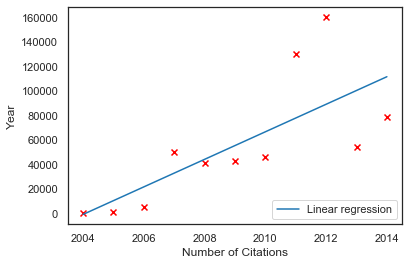

In [28]:
xx = np.arange(2004,2015)
plt.scatter(X[:,1],y , c= 'r', marker='x',linewidths= 1)
plt.plot(xx,reg.intercept_ + reg.coef_[1] * xx, label='Linear regression')
plt.xlabel('Number of Citations')
plt.ylabel('Year')
plt.legend(loc=4);

### Question 3 Looking only at vehicles that have open penalty fees, what dollar amount is the 81st percentile of that group?

In [29]:
data3 = rawData[(rawData['OpenPenalty'].notnull()) & (rawData['OpenPenalty'] > 0)]

In [30]:
data3.quantile(0.81)

Citation           96969635.4
ExpYY                    16.0
ViolCode                 27.0
ViolFine                 52.0
Balance                 552.0
PenaltyDate               NaN
OpenFine                 52.0
OpenPenalty             480.0
CouncilDistrict          12.0
year                   2016.0
Name: 0.81, dtype: float64

### Question 4 Find the ten vehicle makes that received the most citations during 2017.

In [31]:
data4 = rawData.copy()

In [32]:
data4 = data4[(data4['Make'].notnull()) & (data4['year'] == 2017)]

In [33]:
data4

,Citation,Tag,ExpMM,ExpYY,State,Make,Address,ViolCode,Description,ViolFine,...,PenaltyDate,OpenFine,OpenPenalty,NoticeDate,ImportDate,Neighborhood,PoliceDistrict,CouncilDistrict,Location,year
632,50013862,7AC9218,01,19.0,MD,TOYT,E North AVE WB @ N Howard St,30,Red Light Violation,75.0,...,NaN,0.0,0.0,NaN,09/20/2017 04:03:00 AM,NaN,NaN,NaN,"E N North AVE WB\nBaltimore, MD",2017
677,50097410,2EYW11,04,19.0,MD,HOND,Loch Raven Blvd NB @ E Belvede,30,Red Light Violation,75.0,...,NaN,0.0,0.0,NaN,10/21/2017 04:02:00 AM,NaN,NaN,NaN,"E Loch Raven Blvd NB\nBaltimore, MD",2017
699,50129379,LB0393,00,0.0,MD,MERZ,Loch Raven Blvd SB @ E Belvede,30,Red Light Violation,75.0,...,NaN,0.0,0.0,NaN,10/31/2017 04:02:00 AM,NaN,NaN,NaN,"E Loch Raven Blvd SB\nBaltimore, MD",2017
704,50131359,5BP5889,00,0.0,MD,FORD,Pulaski Hwy EB @ N North Point,30,Red Light Violation,75.0,...,NaN,0.0,0.0,NaN,10/31/2017 04:02:00 AM,NaN,NaN,NaN,"N Pulaski Hwy EB\nBaltimore, MD",2017
727,50151134,3CY2133,00,0.0,MD,NISS,Pulaski Hwy EB @ Moravia Park,30,Red Light Violation,75.0,...,NaN,0.0,0.0,NaN,11/03/2017 04:02:00 AM,NaN,NaN,NaN,"Pulaski Hwy EB\nBaltimore, MD",2017
732,50151464,9CJ2795,00,0.0,MD,MAZD,N Fulton AVE NB @ W North AVE,30,Red Light Violation,75.0,...,NaN,0.0,0.0,NaN,11/03/2017 04:02:00 AM,NaN,NaN,NaN,"N W Fulton AVE NB\nBaltimore, MD",2017
748,50188540,6BE9011,00,0.0,MD,HOND,N Fulton AVE NB @ W North AVE,30,Red Light Violation,75.0,...,NaN,0.0,0.0,NaN,11/09/2017 04:02:00 AM,NaN,NaN,NaN,"N W Fulton AVE NB\nBaltimore, MD",2017
768,50223370,8AW1779,10,18.0,MD,BMW,Loch Raven Blvd NB @ E Belvede,30,Red Light Violation,75.0,...,NaN,0.0,0.0,NaN,11/21/2017 04:02:00 AM,NaN,NaN,NaN,"E Loch Raven Blvd NB\nBaltimore, MD",2017
779,50233700,A311037,07,18.0,MD,BUIC,Erdman AVE WB @ N Macon St,30,Red Light Violation,75.0,...,NaN,0.0,0.0,NaN,11/24/2017 04:02:00 AM,NaN,NaN,NaN,"N Erdman AVE WB\nBaltimore, MD",2017
786,50257246,1BR2635,08,18.0,MD,NISS,Loch Raven Blvd SB @ E Belvede,30,Red Light Violation,75.0,...,NaN,0.0,0.0,NaN,11/25/2017 04:02:00 AM,NaN,NaN,NaN,"E Loch Raven Blvd SB\nBaltimore, MD",2017


In [34]:
brands = data4.groupby('Make')['Citation'].count()

In [35]:
brands.shape

(521,)

In [36]:
brands.mean()

1063.0134357005759

In [37]:
filteredB = brands[brands > brands.mean()]

In [38]:
filteredB

Make
ACUR      6867
ACURA    10476
AUDI      4941
BMW      11587
BUIC      2957
BUICK     3710
CADI      2263
CADIL     3095
CHEV     21705
CHEVR    27745
CHRY      6211
CHRYS     6704
DODG      9011
DODGE    12260
FORD     56786
GMC       6891
HOND     27368
HONDA    43049
HYUN     11746
HYUND    16299
INFI      3244
INFIN     4443
JEEP     16973
KIA       9909
LEXS      4570
LEXU      1152
LEXUS     7483
LINC      1692
LINCO     2348
MAZD      3558
MAZDA     7995
MERC      1542
MERCE     7276
MERCU     2284
MERZ      4590
MINI-     1380
MITS      1528
MITSU     2398
NISS     22014
NISSA    27991
PONT      1220
PONTI     2235
SATUR     2131
SCION     1799
SUBA      3038
SUBAR     6552
TOYOT    40844
TOYT     27590
TRAIL     7258
VOLK      4362
VOLKS     9903
VOLV      1891
VOLVO     3677
Name: Citation, dtype: int64

In [39]:
Blist = list(zip(filteredB.index, filteredB))

In [40]:
temp = {}
i = 0
while i < len(Blist): 
    cur = Blist[i][0][:3]
    j = i + 1
    Lcur = Blist[i][0]
    if cur == 'VOL':
        cur = Blist[i][0][:4]
    values = Blist[i][1]
    while j < len(Blist) and (cur in Blist[j][0]):
        if Blist[j][0] == 'MERCU':
            temp[Blist[j][0]] = Blist[j][1]
            j += 1
            continue
        values += Blist[j][1]
        print(Blist[j][0])
        print(Lcur)
        
        if len(Blist[j][0]) > len(Lcur):
            Lcur = Blist[j][0]
        j += 1
    temp[Lcur] = values
    i = j
print(temp)

ACURA
ACUR
BUICK
BUIC
CADIL
CADI
CHEVR
CHEV
CHRYS
CHRY
DODGE
DODG
HONDA
HOND
HYUND
HYUN
INFIN
INFI
LEXU
LEXS
LEXUS
LEXS
LINCO
LINC
MAZDA
MAZD
MERCE
MERC
MERZ
MERCE
MITSU
MITS
NISSA
NISS
PONTI
PONT
SUBAR
SUBA
TOYT
TOYOT
VOLKS
VOLK
VOLVO
VOLV
{'ACURA': 17343, 'AUDI': 4941, 'BMW': 11587, 'BUICK': 6667, 'CADIL': 5358, 'CHEVR': 49450, 'CHRYS': 12915, 'DODGE': 21271, 'FORD': 56786, 'GMC': 6891, 'HONDA': 70417, 'HYUND': 28045, 'INFIN': 7687, 'JEEP': 16973, 'KIA': 9909, 'LEXUS': 13205, 'LINCO': 4040, 'MAZDA': 11553, 'MERCU': 2284, 'MERCE': 13408, 'MINI-': 1380, 'MITSU': 3926, 'NISSA': 50005, 'PONTI': 3455, 'SATUR': 2131, 'SCION': 1799, 'SUBAR': 9590, 'TOYOT': 68434, 'TRAIL': 7258, 'VOLKS': 14265, 'VOLVO': 5568}


In [41]:
ranking = pd.Series(temp, name='Citations')
ranking.index.name = 'Make'

In [42]:
final3 = ranking.sort_values(ascending=False)[:10]

In [43]:
final3

Make
HONDA    70417
TOYOT    68434
FORD     56786
NISSA    50005
CHEVR    49450
HYUND    28045
DODGE    21271
ACURA    17343
JEEP     16973
VOLKS    14265
Name: Citations, dtype: int64

In [44]:
s = final3.sum()

In [45]:
z = 0
fd = final3.to_dict()

In [46]:
for key in fd:
    if key in {'HONDA', 'TOYOT', 'NISSA', 'ACURA'}:
        z += fd[key]
print(z)
print(z/s)

206199
0.5246940754066908


LEXUS TOYOTA HONDA MAZDA SUBARU SUZUKI ACURA NISSAN MITSUBISHI INFINITY ISUZU DAIHATZU

### Quest 5 determine how many instances of auto theft ocurred in each police district during 2015. 

In [47]:
rawCrime = pd.read_csv('./BPD_Part_1_Victim_Based_Crime_Data.csv')

In [48]:
rawCrime.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,vri_name1,Total Incidents
0,07/20/2019,00:12:00,4A,1800 ORLEANS ST,AGG. ASSAULT,O,FIREARM,321.0,EASTERN,DUNBAR,-76.591305,39.295327,NaN,STREET,NaN,1
1,07/20/2019,02:00:00,3AF,700 N LINWOOD AVE,ROBBERY - STREET,O,FIREARM,323.0,EASTERN,MADISON EASTEND,-76.576691,39.299120,NaN,STREET,NaN,1
2,07/20/2019,23:33:00,5A,3100 BARCLAY ST,BURGLARY,I,NaN,513.0,NORTHERN,ABELL,-76.611089,39.326153,NaN,ROW/TOWNHOUSE-OCC,NaN,1
3,07/20/2019,15:50:00,6G,1000 W 36TH ST,LARCENY,I,NaN,531.0,NORTHERN,HAMPDEN,-76.633474,39.330852,NaN,OTHER - INSIDE,NaN,1
4,07/20/2019,19:00:00,6E,800 GILRUBIN CT,LARCENY,I,NaN,542.0,NORTHERN,PEN LUCY,-76.603411,39.341794,NaN,APT/CONDO - OCCUPIED,NaN,1


In [49]:
rawAutoTheft = rawCrime[rawCrime['Description']  == 'AUTO THEFT']

In [50]:
rawAutoTheft['CrimeDate'] = pd.to_datetime(rawAutoTheft['CrimeDate'])

/Users/weihaoran/.virtualenvs/nlp/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [51]:
rawAutoTheft['year'] = rawAutoTheft['CrimeDate'].apply(lambda x : x.year)

/Users/weihaoran/.virtualenvs/nlp/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [52]:
autoTheft = rawAutoTheft[rawAutoTheft['year'] == 2015]
autoTheft.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,vri_name1,Total Incidents,year
173577,2015-12-31,14:00:00,7A,2100 W LAFAYETTE AVE,AUTO THEFT,O,NaN,722.0,WESTERN,MIDTOWN EDMONDSON,-76.651014,39.298589,NaN,STREET,NaN,1,2015
173596,2015-12-31,02:30:00,7A,1000 TYSON ST,AUTO THEFT,O,NaN,141.0,CENTRAL,MID-TOWN BELVEDERE,-76.618643,39.301505,NaN,STREET,NaN,1,2015
173617,2015-12-31,15:30:00,7A,5200 HILLWELL RD,AUTO THEFT,O,NaN,823.0,SOUTHWEST,WESTGATE,-76.702714,39.281864,NaN,STREET,NaN,1,2015
173631,2015-12-31,15:45:00,7A,3300 BLOOMINGDALE RD,AUTO THEFT,O,NaN,811.0,SOUTHWEST,WALBROOK,-76.672808,39.310713,NaN,STREET,NaN,1,2015
173641,2015-12-31,14:45:00,7A,4400 WILLSHIRE AVE,AUTO THEFT,O,NaN,444.0,NORTHEAST,FRANKFORD,-76.546781,39.337122,NaN,PARKING LOT-OUTSIDE,NaN,1,2015


In [53]:
instances = autoTheft.groupby('District')['Total Incidents'].count()
instances.drop(labels=['UNKNOWN']) 

District
CENTRAL      294
EASTERN      336
NORTHEAST    821
NORTHERN     498
NORTHWEST    567
SOUTHEAST    494
SOUTHERN     453
SOUTHWEST    557
WESTERN      542
Name: Total Incidents, dtype: int64

In [65]:
citationsDistrict = Data1[Data1['year'] == 2015].groupby('PoliceDistrict').count()['Citation']

In [66]:
citationsDistrict

PoliceDistrict
CENTRAL         11852
EASTERN          3125
NORTHEASTERN     1427
NORTHERN         9586
NORTHWESTERN     1731
NOTHEASTERN      2684
SOUTHEASTERN    14981
SOUTHERN        12422
SOUTHWESTERN     2610
WESTERN          2481
Name: Citation, dtype: int64

In [68]:
citationsDistrict['NORTHEASTERN'] += citationsDistrict['NOTHEASTERN']
citationsDistrict.drop(labels=['NOTHEASTERN'])

PoliceDistrict
CENTRAL         11852
EASTERN          3125
NORTHEASTERN     4111
NORTHERN         9586
NORTHWESTERN     1731
SOUTHEASTERN    14981
SOUTHERN        12422
SOUTHWESTERN     2610
WESTERN          2481
Name: Citation, dtype: int64

In [69]:
ratios = instances.to_numpy()/citationsDistrict.to_numpy()

In [70]:
pd.Series(data=ratios, index=citationsDistrict.index).sort_values()

PoliceDistrict
SOUTHWESTERN    0.001149
CENTRAL         0.024806
SOUTHEASTERN    0.030238
SOUTHERN        0.044840
NORTHERN        0.051951
EASTERN         0.107520
NOTHEASTERN     0.184054
NORTHEASTERN    0.199708
WESTERN         0.218460
NORTHWESTERN    0.327556
dtype: float64